# Machine Learning: Model 1



## Logistic Regression

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
import joblib

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image

### Read CSV and perform data cleaning

In [2]:
df = pd.read_csv("./Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


* Let's review correlation coefficients among variables

In [3]:
df.corr()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,...,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,...,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,...,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,...,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,...,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,...,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,...,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,...,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,...,-0.056111,-0.046285,0.035131,-0.116730,0.047142,0.068065,-0.042652,-0.003804,-0.009188,-0.041119
koi_time0bk_err2,-0.250697,0.177043,0.023107,-0.013635,-0.272529,-0.472034,0.472034,-0.162845,-1.000000,1.000000,...,0.056111,0.046285,-0.035131,0.116730,-0.047142,-0.068065,0.042652,0.003804,0.009188,0.041119


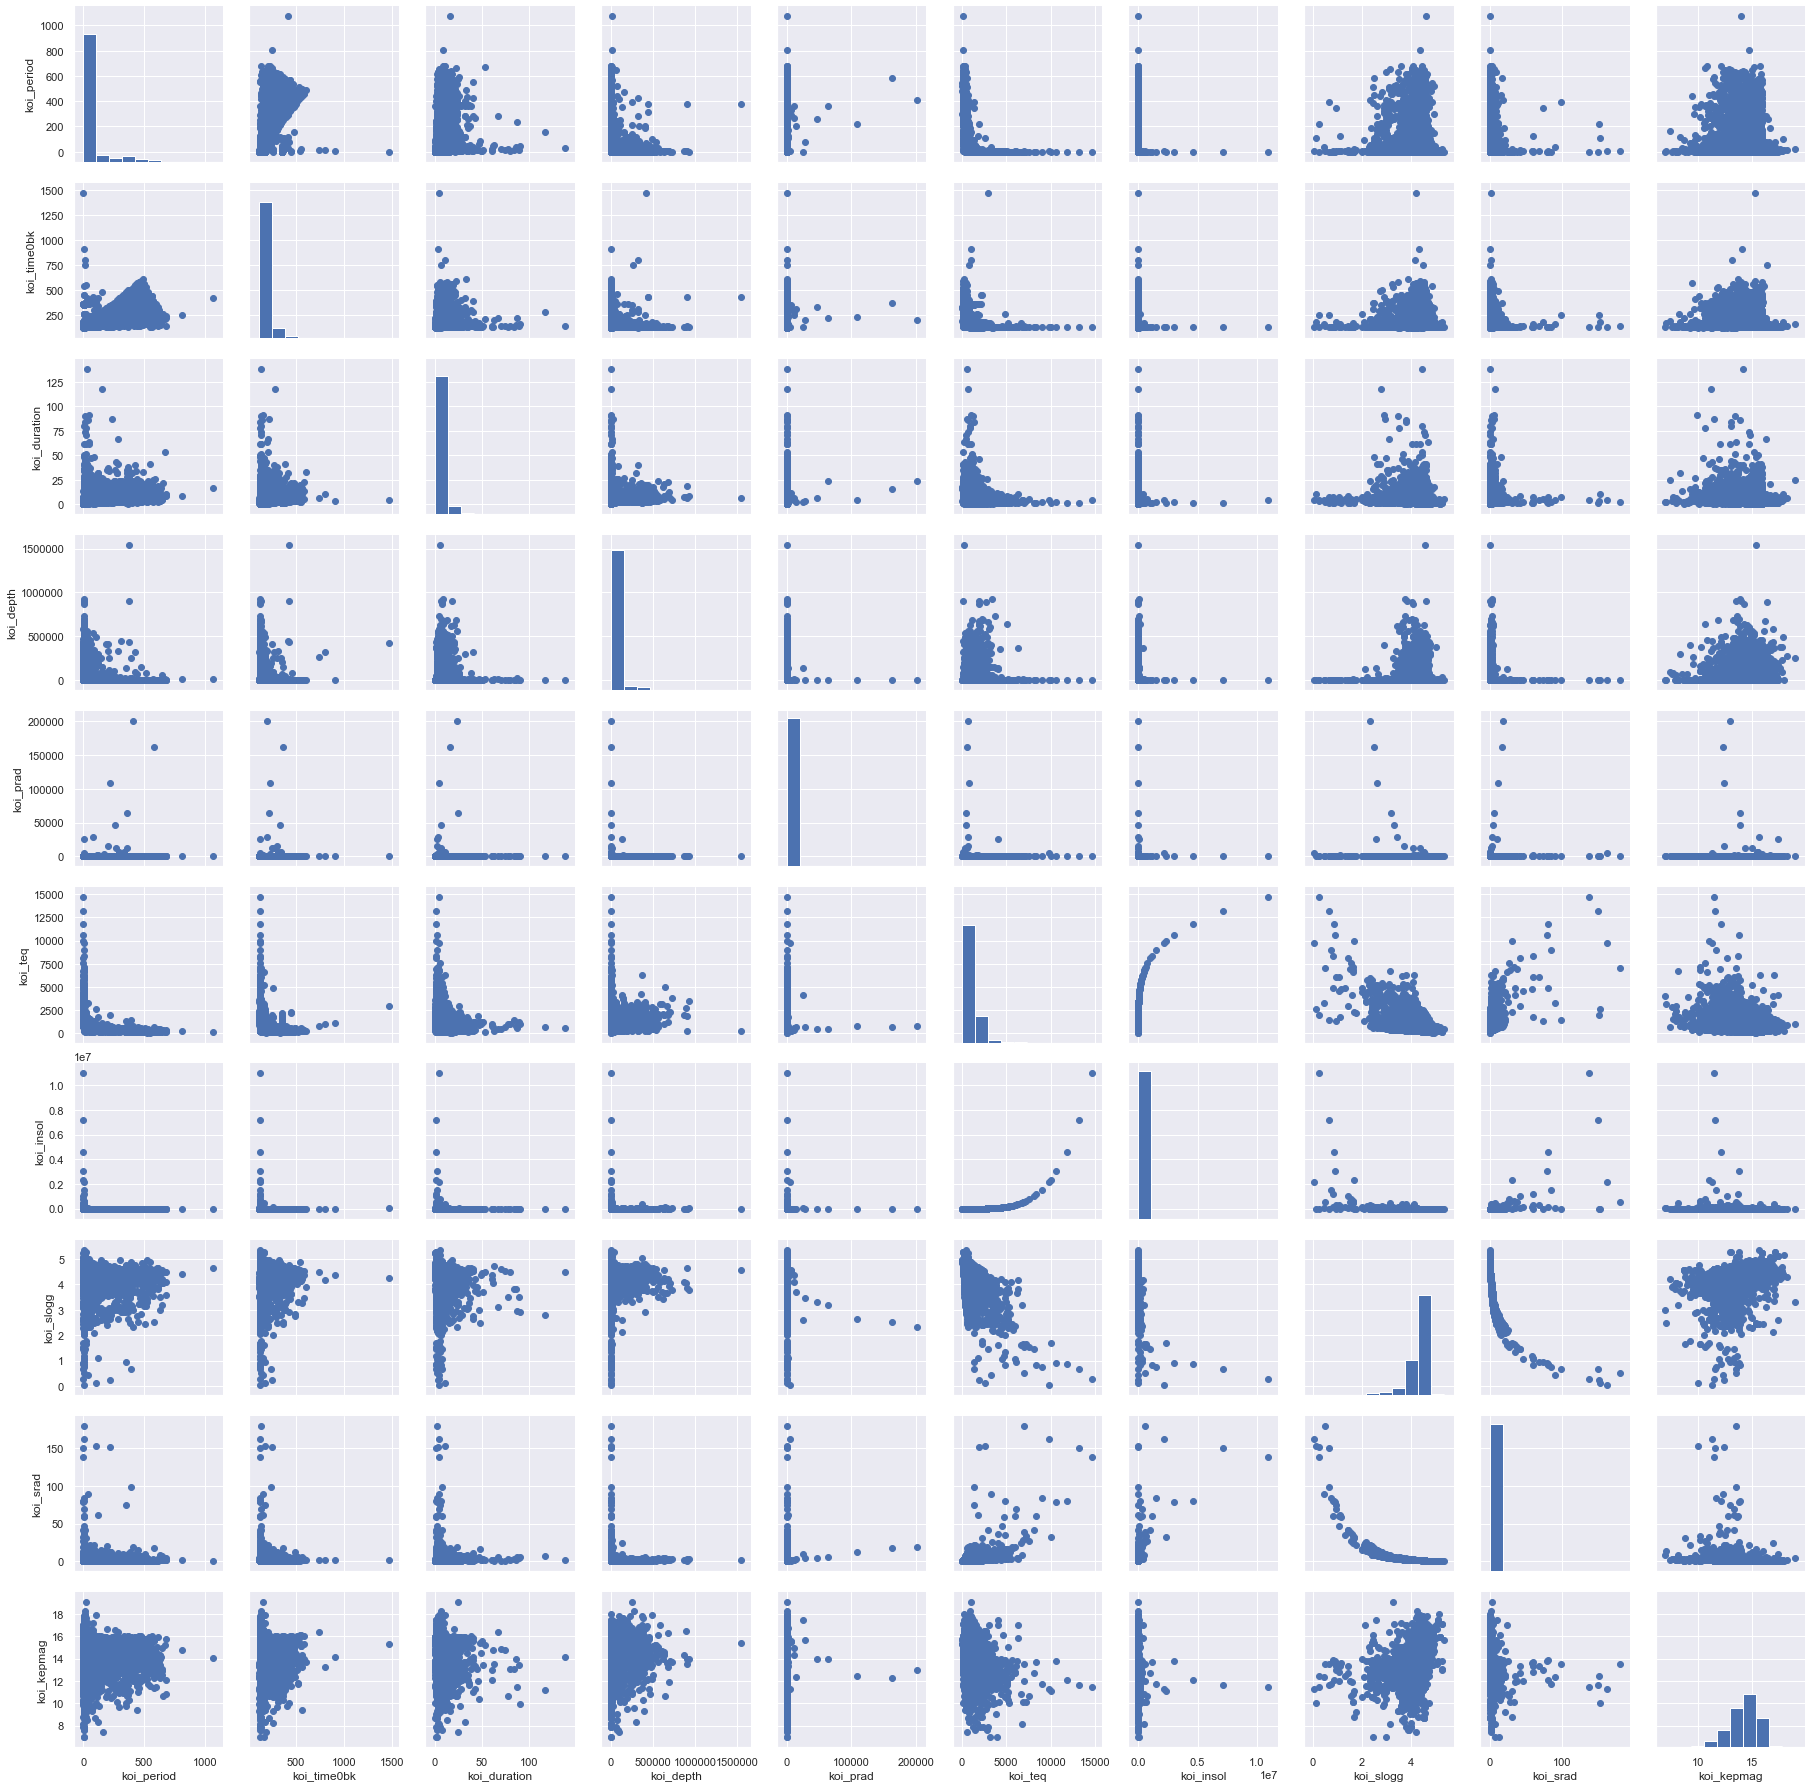

In [4]:
# Use Pair Plot to visualize the correlation between the variables in the study

pairplot = df[['koi_period', 'koi_time0bk','koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad', 'koi_kepmag']]

plot = sns.PairGrid(pairplot)
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)

### Select our features

* Set features.Defining X and Y values

In [24]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_time0bk', 'koi_srad', 'koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_srad']]
X = selected_features

In [25]:
y = df[['koi_disposition']]

X
y

,koi_period,koi_time0bk,koi_srad,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_srad
0,54.418383,162.513840,0.927,4.50700,874.8,2.83,443,9.11,0.927
1,19.899140,175.850252,0.868,1.78220,10829.0,14.60,638,39.30,0.868
2,1.736952,170.307565,0.791,2.40641,8079.2,33.46,1395,891.96,0.791
3,2.525592,171.595550,1.046,1.65450,603.3,2.75,1406,926.16,1.046
4,4.134435,172.979370,0.972,3.14020,686.0,2.77,1160,427.65,0.972
...,...,...,...,...,...,...,...,...,...
6986,8.589871,132.016100,1.088,4.80600,87.7,1.11,929,176.40,1.088
6987,0.527699,131.705093,0.903,3.22210,1579.2,29.35,2088,4500.53,0.903
6988,1.739849,133.001270,1.031,3.11400,48.5,0.72,1608,1585.81,1.031
6989,0.681402,132.181750,1.041,0.86500,103.6,1.07,2218,5713.41,1.041


,koi_disposition
0,CONFIRMED
1,FALSE POSITIVE
2,FALSE POSITIVE
3,CONFIRMED
4,CONFIRMED
...,...
6986,FALSE POSITIVE
6987,FALSE POSITIVE
6988,CANDIDATE
6989,FALSE POSITIVE


### Train test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

In [27]:
X.shape
X_train.shape
X_test.shape
y.shape
y_train.shape
y_test.shape

(6991, 9)

(5592, 9)

(1399, 9)

(6991, 1)

(5592, 1)

(1399, 1)

In [28]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### Pre-processing

* Scale the data

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

In [30]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled[0:10]
X_test_scaled[0:10]

array([[4.71723553e-01, 2.49674586e-01, 4.02436855e-03, 7.18478910e-02,
        1.11347384e-03, 1.65713432e-05, 6.10634648e-03, 2.10092582e-08,
        4.02436855e-03],
       [1.55699479e-02, 1.23773721e-02, 3.31843650e-03, 2.32838514e-02,
        2.19671527e-04, 5.83990106e-06, 2.85420240e-02, 1.43867747e-06,
        3.31843650e-03],
       [3.50382641e-04, 9.98886882e-03, 5.27503557e-03, 1.36253247e-02,
        2.14801255e-02, 2.87652562e-04, 1.54991424e-01, 6.57105656e-04,
        5.27503557e-03],
       [2.10044058e-03, 9.31680965e-03, 5.40288154e-03, 1.18999605e-02,
        1.14571741e-04, 6.63852001e-06, 9.54373928e-02, 1.04408706e-04,
        5.40288154e-03],
       [2.71122848e-01, 1.69521304e-01, 1.27845962e-02, 3.05334021e-02,
        9.07620987e-05, 1.35765221e-05, 1.94168096e-02, 4.24752394e-07,
        1.27845962e-02],
       [2.86634557e-04, 8.35483195e-03, 4.99155105e-03, 1.82243443e-02,
        5.91024102e-05, 4.49223158e-06, 1.49433962e-01, 5.73312513e-04,
        4.9

array([[3.79774922e-03, 8.19018776e-03, 2.13780683e-02, 2.66375817e-02,
        4.95655778e-05, 1.71703074e-05, 1.31183533e-01, 3.47643850e-04,
        2.13780683e-02],
       [7.40221856e-03, 1.03811193e-01, 4.11330487e-03, 2.06760369e-02,
        3.30804818e-04, 8.88463580e-06, 4.73413379e-02, 8.06938205e-06,
        4.11330487e-03],
       [2.24888351e-03, 8.26350842e-03, 4.39123088e-03, 1.61000742e-02,
        1.67705522e-04, 6.68843369e-06, 7.95883362e-02, 5.31040972e-05,
        4.39123088e-03],
       [7.92949851e-03, 3.70714196e-02, 2.16226432e-03, 1.58116823e-02,
        8.82254310e-04, 8.43541264e-06, 2.46312178e-02, 8.89696413e-07,
        2.16226432e-03],
       [4.76569571e-03, 1.04542599e-02, 5.49737638e-03, 1.99012095e-02,
        6.91582539e-05, 5.04128211e-06, 6.63464837e-02, 2.71028566e-05,
        5.49737638e-03],
       [3.74279695e-04, 8.26050547e-03, 5.69748310e-03, 1.89615868e-02,
        8.19389068e-05, 5.88981474e-06, 1.57324185e-01, 6.94755160e-04,
        5.6

### Train the Model

In [32]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(max_iter=120000)
regressor

LogisticRegression(max_iter=120000)

In [33]:
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=120000)

In [34]:
print(f"Training Data Score: {regressor.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {regressor.score(X_test_scaled, y_test)}")

Training Data Score: 0.4361587982832618
Testing Data Score: 0.4403145103645461


In [35]:
predictions = regressor.predict(X_test)

result = pd.DataFrame({"Actual": y_test, "Prediction": predictions})

result.head(100)

,Actual,Prediction
0,CANDIDATE,FALSE POSITIVE
1,CONFIRMED,CONFIRMED
2,CONFIRMED,FALSE POSITIVE
3,CONFIRMED,CONFIRMED
4,CANDIDATE,CONFIRMED
...,...,...
95,CANDIDATE,FALSE POSITIVE
96,FALSE POSITIVE,FALSE POSITIVE
97,CONFIRMED,CONFIRMED
98,CONFIRMED,FALSE POSITIVE


### Hyperparameter Tuning

* Use GridSearchCV to tune the model's parameters
* Create GridSearchCV model

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10], 'penalty': ["l2"]}
grid = GridSearchCV(regressor, param_grid, verbose=3)

* Train the model with GridSearch

In [37]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=1, penalty=l2 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, penalty=l2, score=0.624, total=   3.7s
[CV] C=1, penalty=l2 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ..................... C=1, penalty=l2, score=0.587, total=   2.5s
[CV] C=1, penalty=l2 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV] ..................... C=1, penalty=l2, score=0.605, total=   1.9s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.634, total=   6.7s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.600, total=   2.8s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.617, total=   3.3s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.588, total=   1.6s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.620, total=   3.5s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.631, total=   4.9s
[CV] C=5, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   52.9s finished


GridSearchCV(estimator=LogisticRegression(max_iter=120000),
             param_grid={'C': [1, 5, 10], 'penalty': ['l2']}, verbose=3)

In [38]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.6121281299908397


In [39]:
grid_prediction = grid.predict(X_test)

grid_result = pd.DataFrame({"Actual": y_test, "Prediction": grid_prediction})

grid_result.head()

,Actual,Prediction
0,CANDIDATE,FALSE POSITIVE
1,CONFIRMED,CONFIRMED
2,CONFIRMED,FALSE POSITIVE
3,CONFIRMED,CONFIRMED
4,CANDIDATE,FALSE POSITIVE


In [40]:
from sklearn.metrics import classification_report

# Check accuracy rate of the model in classification report
print(classification_report(y_test, regressor.predict(X_test)))

                precision    recall  f1-score   support

     CANDIDATE       0.51      0.08      0.14       338
     CONFIRMED       0.49      0.65      0.56       360
FALSE POSITIVE       0.67      0.83      0.74       701

      accuracy                           0.60      1399
     macro avg       0.56      0.52      0.48      1399
  weighted avg       0.58      0.60      0.55      1399



### Export Dataframe

In [41]:
grid_result.to_csv("./Model1_grid_result.csv")

### Save the Model

In [42]:
import joblib

filename = './Log_Reg_model1.sav'
joblib.dump(grid, filename)

['./Log_Reg_model1.sav']